### 1. 生成一些类似线性模型的数据
- 添加了随机误差

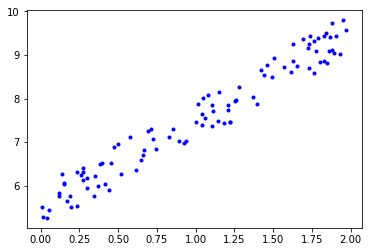

In [97]:
import numpy as np
import matplotlib.pyplot as plt
m = 100  # 样本量
X = 2 * np.random.rand(m, 1)  # 取大小在区间(0, 1)上的随机数，构成一个100*1的矩阵
y = 5 + 2 * X + np.random.rand(m, 1)
plt.plot(X, y, "b.")
plt.show()
plt.savefig("linear_regression_raw_data.png", dpi=200)

### 2. 梯度下降的原始实现

#### 代价函数的计算

In [39]:
def L_theta(theta, X_x0, y):
    delta = np.dot(X_x0, theta) - y  # np.dot 表示矩阵乘法
    L_theta = np.sum(np.multiply(delta, delta))
    return L_theta

#### 梯度下降的训练过程

In [63]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.06  # 学习率
X_x0 = np.c_[np.ones((100, 1)), X]  # ADD X0 = 1 to each instance

# print(np.multiply(delta, delta))

# print(L_theta)
for i in range(T):
    theta_0 = theta[0, 0]
    theta_1 = theta[1, 0]
    theta_0 -= alpha*(1/m * np.sum(np.dot(X_x0, theta) - y))
    theta_1 -= alpha*(1/m * np.sum(np.dot(np.transpose(X), np.dot(X_x0, theta) - y)))
    theta[0, 0] = theta_0
    theta[1, 0] = theta_1
    if i%100==0:
        print(L_theta(theta, X_x0, y))

2318.32226584
26.2317675878
10.6221201088
8.60799768785
8.3481142323
8.31458131008
8.31025453649
8.30969625023
8.30962421422
8.30961491936


In [73]:
theta  # 训练结束后得到的最优参数值

array([[ 5.48119293],
       [ 1.98150554]])

#### 训练出来的直线与原始数据的比较

In [66]:
h = np.dot(X_x0, theta)

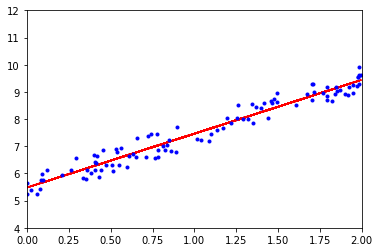

In [75]:
plt.plot(X, h, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 4, 12])
# plt.show()
plt.savefig("linear_regression_compare.png", dpi=200)

#### 有了训练出来的theta值，就可以用来预测新的样本点了

In [71]:
X_new = np.array([[0.5], [1.8]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)

In [72]:
print(X_new)
print(y_predict)

[[ 0.5]
 [ 1.8]]
[[ 6.4719457]
 [ 9.0479029]]


### 3. 利用向量化的梯度来实现梯度下降

In [88]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.18  # 学习率
X_x0 = np.c_[np.ones((100, 1)), X]  # ADD X0 = 1 to each instance

# print(np.multiply(delta, delta))

# print(L_theta)
for i in range(T):
    h = np.dot(X_x0, theta)
    theta -= alpha * 1/m * np.dot(X_x0.T, h - y)
    if i%100==0:
        print(L_theta(theta, X_x0, y))

1143.69070944
8.57809912576
8.31015455643
8.30961463254
8.30961354457
8.30961354237
8.30961354237
8.30961354237
8.30961354237
8.30961354237


In [89]:
theta

array([[ 5.4812737 ],
       [ 1.98144106]])

### 4. 利用sk-learn工具包来实现线性回归

In [93]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 5.4812737] [[ 1.98144106]]


- 利用训练的线性模型预测新的样本点

In [94]:
print(lin_reg.predict(X_new))

[[ 6.47199423]
 [ 9.0478676 ]]
